In [136]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [137]:
df = pd.read_csv('targetfirm_prediction_dataset_small.csv')

# Data PreProcessing ##

In [138]:
len(df)

225010

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225010 entries, 0 to 225009
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  225010 non-null  int64  
 1   gvkey       225010 non-null  int64  
 2   fyear       225010 non-null  float64
 3   target      225010 non-null  float64
 4   at          190375 non-null  float64
 5   revt        189333 non-null  float64
 6   ib          189350 non-null  float64
 7   ca          13611 non-null   float64
 8   capx        161826 non-null  float64
 9   ceq         189947 non-null  float64
 10  che         167934 non-null  float64
 11  emp         161151 non-null  float64
 12  invt        171657 non-null  float64
 13  re          184462 non-null  float64
 14  xrd         74723 non-null   float64
 15  dltt        189974 non-null  float64
 16  dv          159952 non-null  float64
 17  sic         225007 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 30.9 

In [140]:
df.describe()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
count,225010.000000,225010.000000,225010.000000,225010.000000,1.903750e+05,189333.000000,189350.000000,13611.000000,161826.000000,189947.000000,167934.000000,161151.000000,171657.000000,184462.000000,74723.000000,1.899740e+05,159952.000000,225007.000000
mean,159960.153882,85211.710564,2008.494814,0.008271,1.356820e+04,2674.721921,168.458950,218.263614,200.645528,1679.509285,1021.709977,8.284778,442.510445,852.273594,106.568218,2.348486e+03,81.659508,5087.184319
std,86643.401971,70640.366895,5.228876,0.090567,1.113624e+05,12960.867134,1405.855187,2639.164929,1198.104294,8968.691681,12506.464870,38.671780,7214.134475,7289.747952,606.875891,3.624680e+04,547.888315,2097.563238
min,6.000000,1004.000000,2000.000000,0.000000,0.000000e+00,-15009.328000,-99289.000000,-5.000000,-994.000000,-139965.000000,-25.000000,0.000000,0.000000,-143336.328000,-0.648000,-2.300000e-02,-1.506000,100.000000
25%,84679.250000,19150.000000,2004.000000,0.000000,4.124750e+01,14.811000,-3.897000,0.000000,0.257000,12.290000,2.416250,0.086000,0.000000,-45.429250,0.109000,0.000000e+00,0.000000,3562.000000
50%,168669.500000,64022.500000,2009.000000,0.000000,3.571180e+02,112.467000,2.834500,0.000000,3.932500,91.751000,20.750500,0.469000,1.525000,0.261500,3.997000,1.875000e+01,0.000000,6020.000000
75%,237929.750000,154984.000000,2013.000000,0.000000,1.981678e+03,812.776000,44.200000,0.000000,40.825500,546.230000,113.533500,3.176000,40.219000,123.561500,24.602000,3.481110e+02,6.691000,6722.000000
max,294678.000000,345980.000000,2017.000000,1.000000,3.771200e+06,496785.000000,104821.000000,80748.579000,50233.741000,348296.000000,768210.644000,2545.209000,472266.229000,398278.000000,22620.000000,3.296298e+06,82452.000000,9998.000000


In [141]:
df.isna().sum()

Unnamed: 0         0
gvkey              0
fyear              0
target             0
at             34635
revt           35677
ib             35660
ca            211399
capx           63184
ceq            35063
che            57076
emp            63859
invt           53353
re             40548
xrd           150287
dltt           35036
dv             65058
sic                3
dtype: int64

In [142]:
#fill missing vlaues with mean
df = df.fillna(df.mean())

In [143]:
df.target = df.target.astype("int")

In [144]:
df.head()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000.0,0,701.854,874.255,18.531,218.263614,13.134,340.212,13.809,2.5,320.590,204.065,106.568218,179.987,9.157,5080.0
1,7,1004,2001.0,0,710.199,638.721,-58.939,218.263614,12.112,310.235,34.522,2.2,286.588,139.603,106.568218,217.699,4.430,5080.0
2,8,1004,2002.0,0,686.621,606.337,-12.410,218.263614,9.930,294.988,29.154,2.1,259.954,124.106,106.568218,164.658,0.797,5080.0
3,9,1004,2003.0,0,709.292,651.958,3.504,218.263614,10.286,301.684,41.010,2.3,247.245,131.884,106.568218,248.666,0.000,5080.0
4,10,1004,2004.0,0,732.230,747.848,18.572,218.263614,13.033,314.744,50.338,2.6,255.477,142.450,106.568218,227.159,0.000,5080.0


In [145]:
df.target.unique()

array([0, 1])

In [146]:
df = df.drop('Unnamed: 0',axis=1)

In [147]:
df.corr().head()

,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
gvkey,1.000000,0.160542,-0.000995,-0.052220,-0.081814,-0.050005,-0.004283,-0.038852,-0.064974,-0.028512,-0.065483,-0.027142,-0.061338,-0.045521,-0.034277,-0.044896,0.025195
fyear,0.160542,1.000000,-0.022569,0.036306,0.044371,0.039246,0.007969,0.034209,0.060816,0.026801,0.024648,0.007916,0.042632,0.029774,0.023046,0.047745,0.001799
target,-0.000995,-0.022569,1.000000,0.006474,0.010047,0.008064,-0.003644,-0.000253,0.011219,0.006989,-0.000014,0.001875,0.009303,-0.000294,0.000329,0.001563,0.018787
at,-0.052220,0.036306,0.006474,1.000000,0.474030,0.359565,0.192448,0.159620,0.610583,0.609312,0.274405,0.262402,0.442065,0.072130,0.588370,0.313057,0.049428
revt,-0.081814,0.044371,0.010047,0.474030,1.000000,0.573582,0.048293,0.686126,0.705661,0.307668,0.663544,0.229562,0.663673,0.401377,0.270957,0.557407,0.001242


In [148]:
y = df.target.copy()
#X = df.drop(['target','ca','xrd','dltt'], axis=1)
X = df.drop(['target'], axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [150]:
print("X Train:",X_train.shape)
print("Y Train:",y_train.shape)
print("X Test:",X_test.shape)
print("Y Test:",y_test.shape)

X Train: (180008, 16)
Y Train: (180008,)
X Test: (45002, 16)
Y Test: (45002,)


# Logistic Regression with Iter 10^4

In [151]:
model = LogisticRegression(max_iter=10**4)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [152]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(10)

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Accuracy: 0.9917337007244122
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


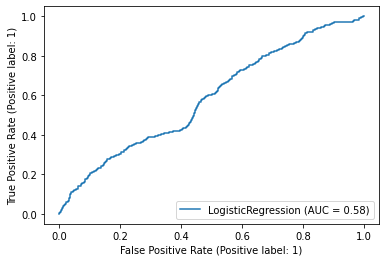

In [153]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(model,X_test,y_test)

# Logistic Regression with Iter 10^5

In [154]:
model = LogisticRegression(max_iter=10**5)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [155]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(10)

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Accuracy: 0.9917337007244122
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


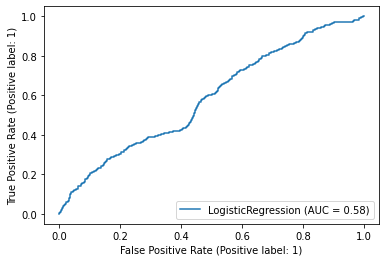

In [156]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(model,X_test,y_test)

# Logistic Regression with Iter 10^6

In [157]:
model = LogisticRegression(max_iter=10**5)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [158]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(10)

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Accuracy: 0.9917337007244122
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.met

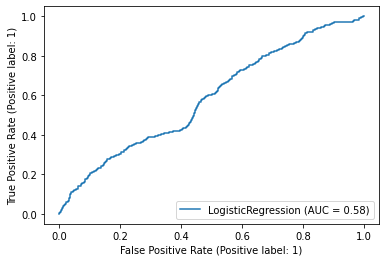

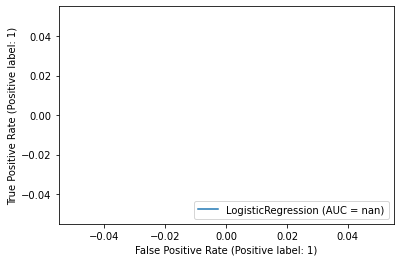

In [159]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model,X_test,y_pred)

Text(0.5, 15.0, 'Predicted')

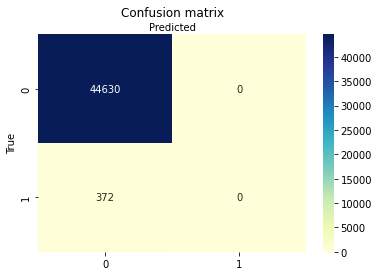

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [161]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

In [162]:
scores.mean()

0.9916537042798097

# SVM

In [163]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

In [164]:
clf = svm.SVC( )
clf = clf.fit(X_train, y_train)

In [165]:
predictions = clf.predict(X_test)

Accuracy: 0.9917337007244122
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


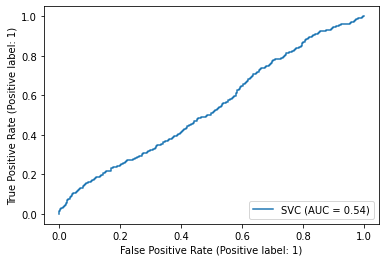

In [166]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1:",metrics.f1_score(y_test, predictions))
metrics.plot_roc_curve(clf,X_test,y_test)

Text(0.5, 15.0, 'Predicted')

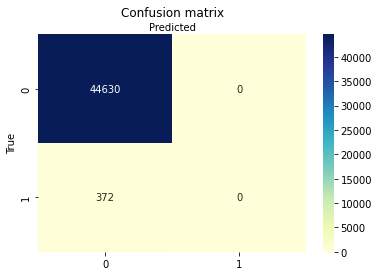

In [167]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Decision Tree with max depth = 6

In [168]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [169]:
 metrics.confusion_matrix(y_test, y_pred_en)

array([[44626,     4],
       [  372,     0]])

Text(0.5, 15.0, 'Predicted')

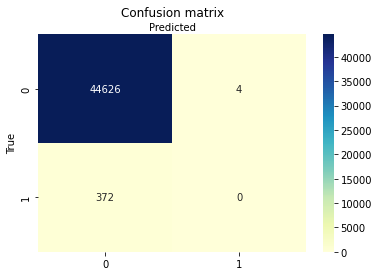

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_en)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Accuracy: 0.9916448157859651
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


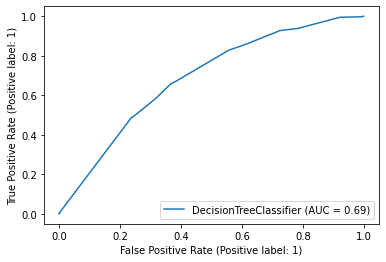

In [171]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_en))
print("Precision:", metrics.precision_score(y_test, y_pred_en))
print("Recall:", metrics.recall_score(y_test, y_pred_en))
print("F1:",metrics.f1_score(y_test, y_pred_en))
metrics.plot_roc_curve(clf_en,X_test,y_test)

In [172]:
from sklearn import tree
text_representation = tree.export_text(clf_en)
#print(text_representation)

In [173]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

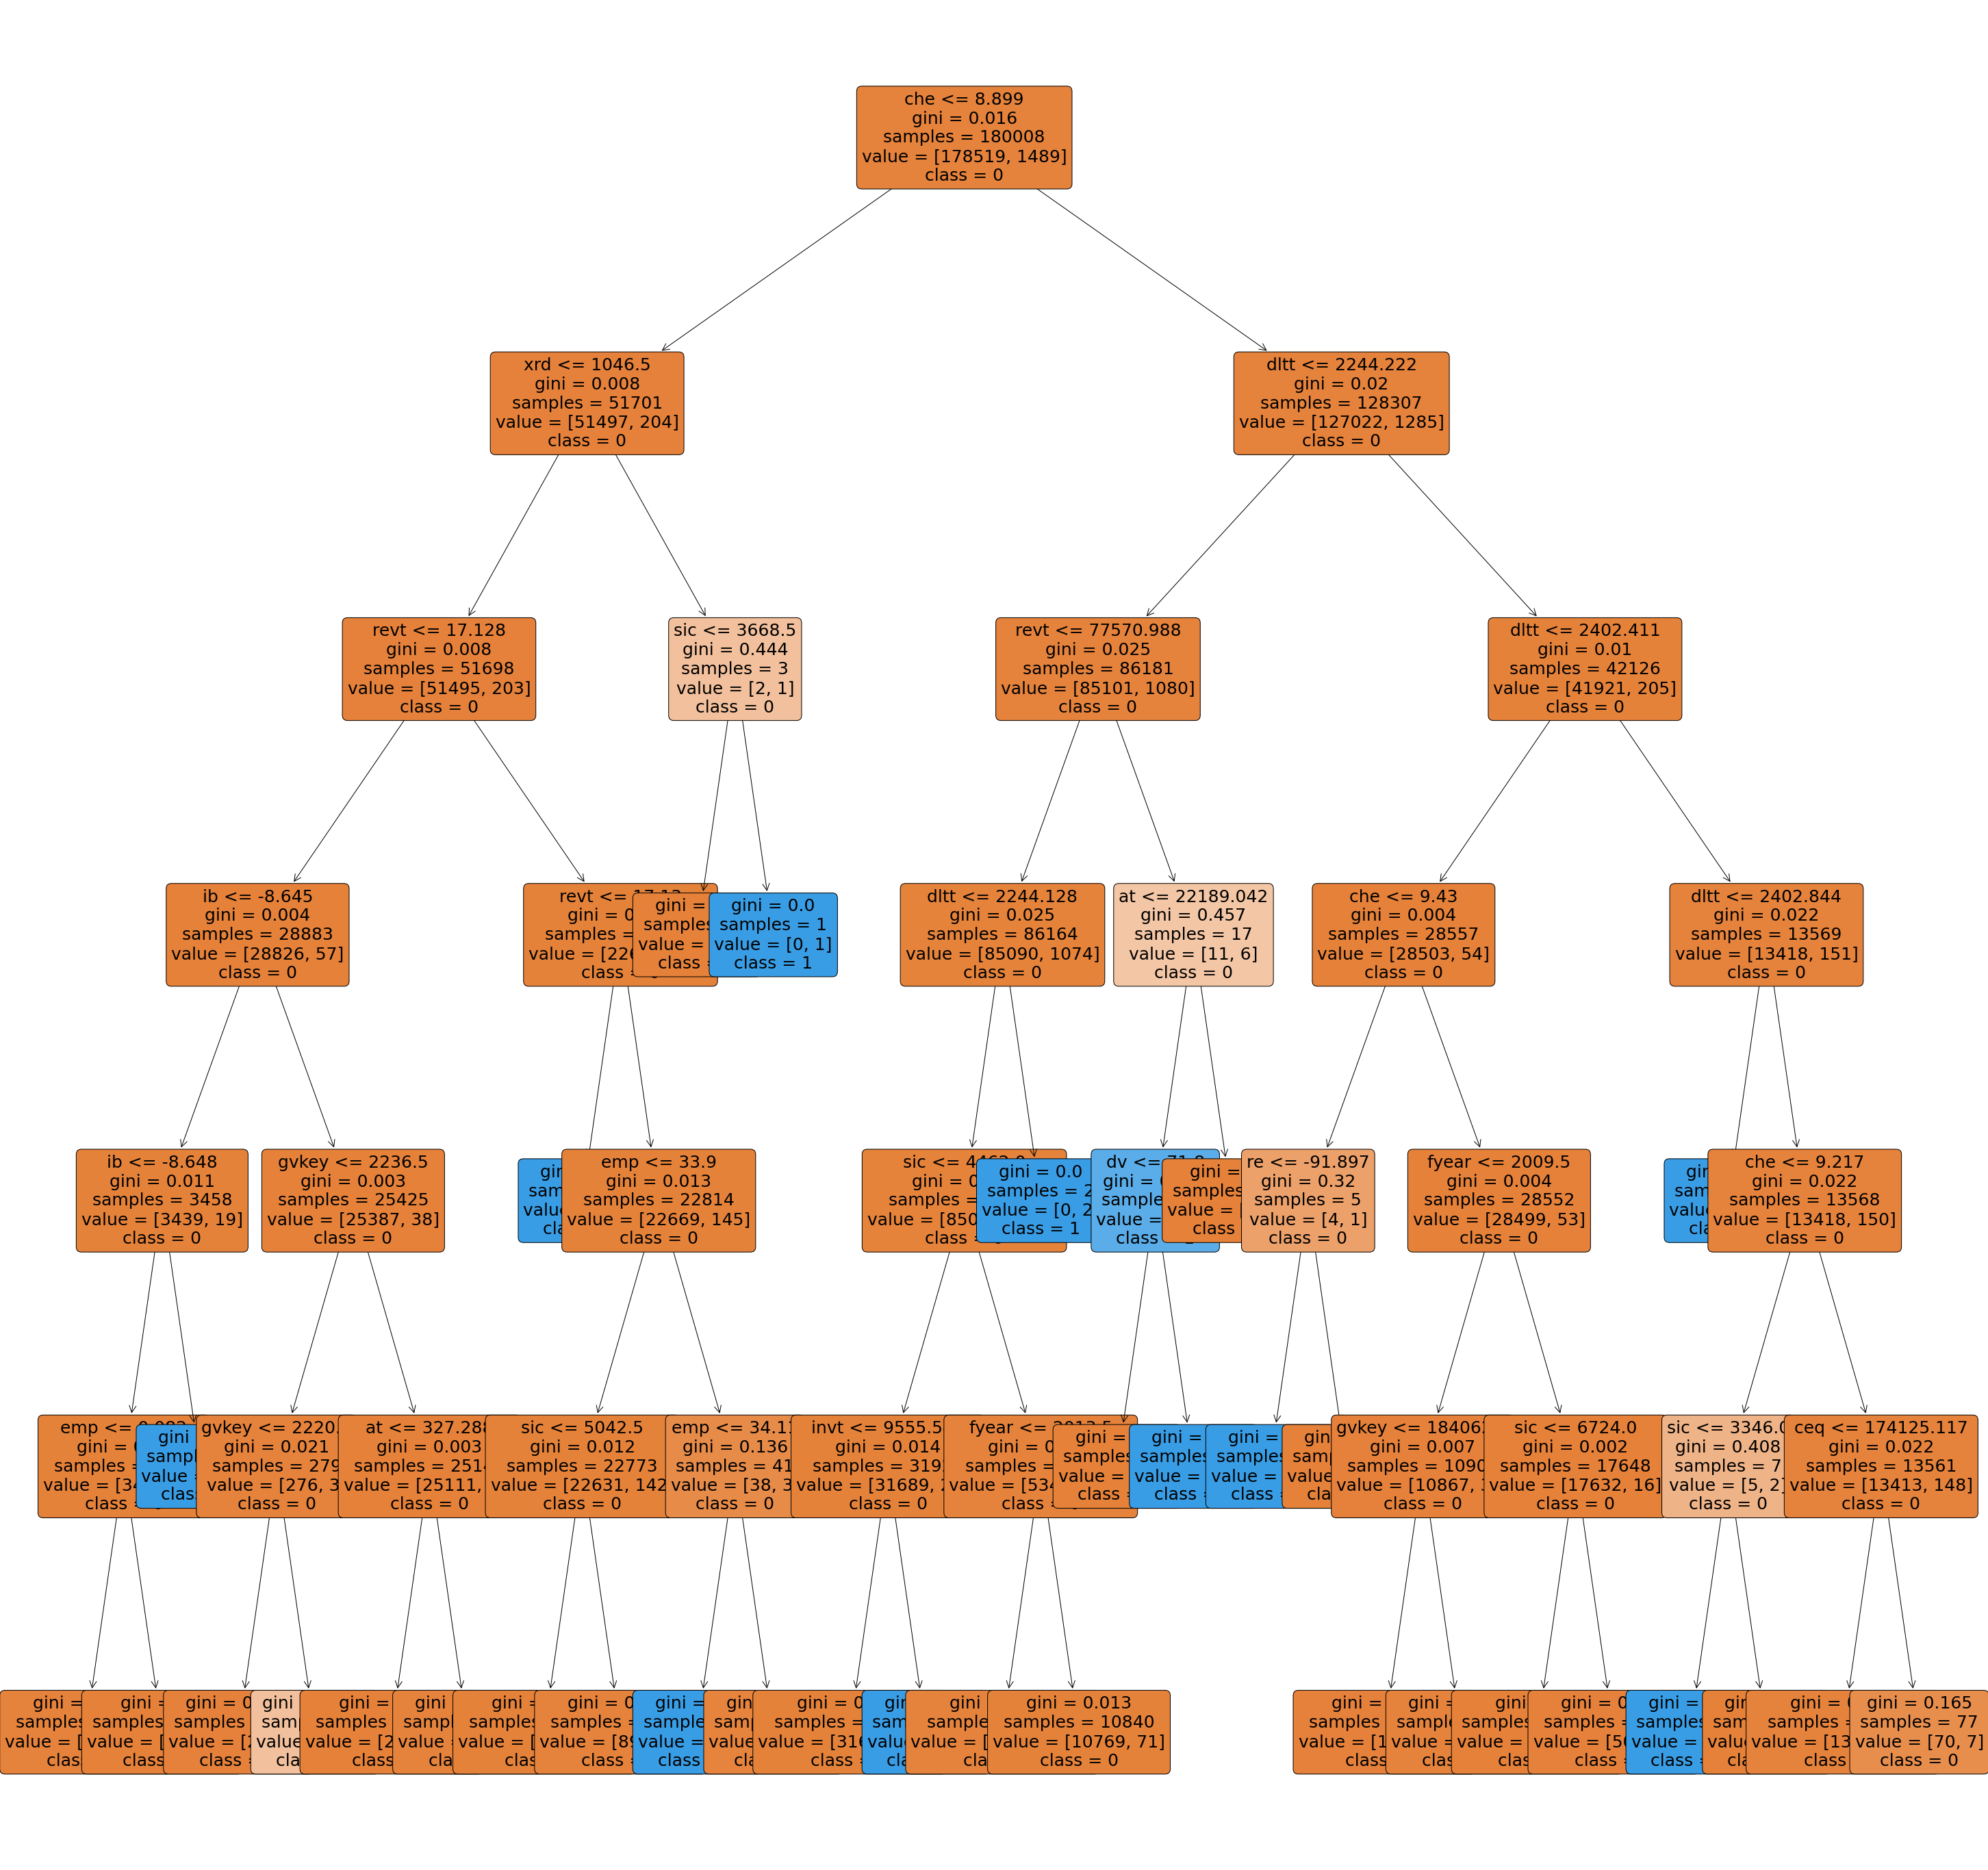

In [174]:
feature_names = list(X.columns)
target_names = list(y.unique())
plt.figure(figsize=(50,50))
tree.plot_tree(clf_en, 
          feature_names = feature_names, 
          class_names = ['0','1'], 
          filled = True,
          rounded = True,
          fontsize=25)
plt.show()

# DT with depth 8

In [175]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [176]:
 metrics.confusion_matrix(y_test, y_pred_en)

array([[44621,     9],
       [  372,     0]])

Text(0.5, 15.0, 'Predicted')

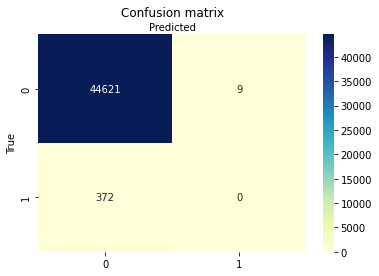

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_en)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Accuracy: 0.9915337096129061
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


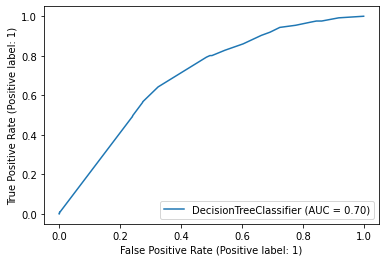

In [178]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_en))
print("Precision:", metrics.precision_score(y_test, y_pred_en))
print("Recall:", metrics.recall_score(y_test, y_pred_en))
print("F1:",metrics.f1_score(y_test, y_pred_en))
metrics.plot_roc_curve(clf_en,X_test,y_test)

# DT with depth 10

In [179]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Text(0.5, 15.0, 'Predicted')

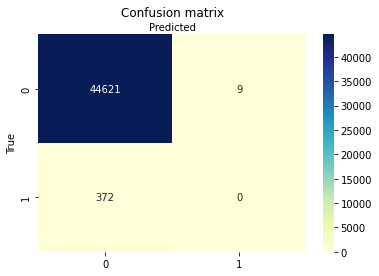

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_en)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Accuracy: 0.9915337096129061
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


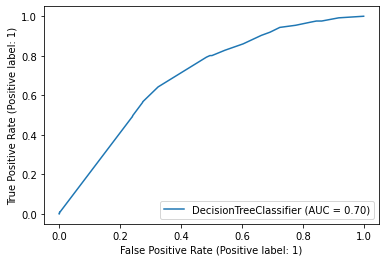

In [181]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_en))
print("Precision:", metrics.precision_score(y_test, y_pred_en))
print("Recall:", metrics.recall_score(y_test, y_pred_en))
print("F1:",metrics.f1_score(y_test, y_pred_en))
metrics.plot_roc_curve(clf_en,X_test,y_test)

# LSTM 

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LSTM
import tensorflow as tf

In [198]:
X = df.copy()
X=X.drop('target',axis=1)
y=df['target']

In [199]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [202]:
model = Sequential()
#model.add(Dense(128, activation='relu', input_shape=[16,]))
model.add(LSTM(16,input_shape=([16,1]),activation='tanh',recurrent_activation='sigmoid'))
#model.add(LSTM(8,activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [203]:
model.fit(x=scaled_X_train, y=y_train, epochs=5, validation_data=(scaled_X_test, y_test))

Epoch 1/5
5626/5626 [==============================] - 60s 10ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 2/5
5626/5626 [==============================] - 48s 9ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 3/5
5626/5626 [==============================] - 49s 9ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 4/5
5626/5626 [==============================] - 50s 9ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 5/5
5626/5626 [==============================] - 50s 9ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919


In [204]:
model.evaluate(scaled_X_test, y_test, verbose=1)

1407/1407 [==============================] - 4s 3ms/step - loss: 0.6932 - accuracy: 0.9919


[0.6931602954864502, 0.9918670058250427]

In [205]:
y_pred=model.predict(scaled_X_test, verbose=1)

1407/1407 [==============================] - 4s 2ms/step


In [206]:
len(y_pred)

45002

In [207]:
y_pred_inv = encoder.inverse_transform(y_pred)

Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


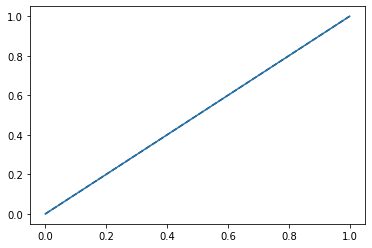

In [208]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
print("F1:",metrics.f1_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve (y_test, y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

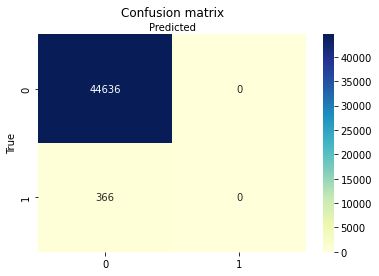

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

#  Dense Neural Network

In [210]:
from tensorflow import keras
from tensorflow.keras import layers

In [211]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[16,]))
model.add(Dense(16, activation='tanh', input_shape=[16,]))
model.add(Dense(16, activation='relu', input_shape=[16,]))
model.add(Dense(2, activation='sigmoid'))
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [212]:
model.fit(x=scaled_X_train, y=y_train, epochs=3, validation_data=(scaled_X_test, y_test))

Epoch 1/3
5626/5626 [==============================] - 11s 2ms/step - loss: 0.0518 - accuracy: 0.9909 - val_loss: 0.0470 - val_accuracy: 0.9919
Epoch 2/3
5626/5626 [==============================] - 11s 2ms/step - loss: 0.0479 - accuracy: 0.9917 - val_loss: 0.0469 - val_accuracy: 0.9919
Epoch 3/3
5626/5626 [==============================] - 11s 2ms/step - loss: 0.0478 - accuracy: 0.9917 - val_loss: 0.0465 - val_accuracy: 0.9919


In [213]:
model.evaluate(scaled_X_test, y_test, verbose=1)

1407/1407 [==============================] - 4s 3ms/step - loss: 0.0465 - accuracy: 0.9919


[0.04651809483766556, 0.9918670058250427]

In [214]:
y_pred=model.predict(scaled_X_test, verbose=1)

1407/1407 [==============================] - 2s 1ms/step


In [215]:
y_pred_inv = encoder.inverse_transform(y_pred)

Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


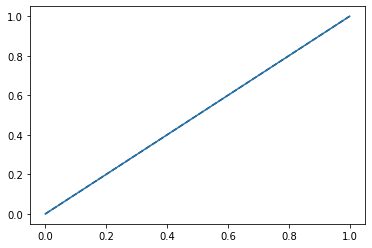

In [216]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve(y_test,y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

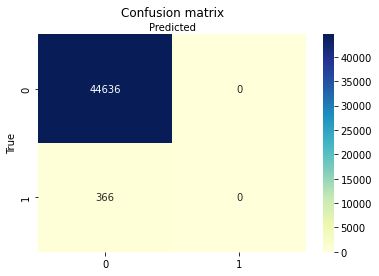

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Recurrent Neural Network

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LSTM, SimpleRNN

In [219]:
X = df.copy()
X=X.drop('target',axis=1)
y=df['target']

In [220]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# input 128, epochs 5

In [223]:
xmodel = Sequential()
xmodel.add(SimpleRNN(128, input_shape=[16,1]))
xmodel.add(Dense(1))
xmodel.build()
xmodel.summary()
xmodel.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [224]:
xmodel.fit(x=scaled_X_train, y=y_train, epochs=5, validation_data=(scaled_X_test, y_test))

Epoch 1/5
5626/5626 [==============================] - 43s 8ms/step - loss: 0.0084 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 2/5
5626/5626 [==============================] - 42s 7ms/step - loss: 0.0083 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 3/5
5626/5626 [==============================] - 42s 7ms/step - loss: 0.0083 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 4/5
5626/5626 [==============================] - 42s 7ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 5/5
5626/5626 [==============================] - 43s 8ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919


In [225]:
xmodel.evaluate(scaled_X_test, y_test, verbose=1)
y_pred=xmodel.predict(scaled_X_test, verbose=1)
y_pred_inv = encoder.inverse_transform(y_pred)

1407/1407 [==============================] - 4s 3ms/step


Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


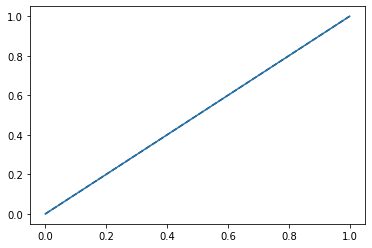

In [226]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
print("F1:",metrics.f1_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve ( y_test, y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

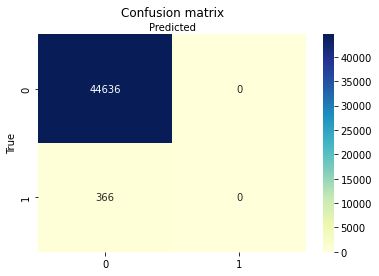

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# input 128, epochs 10

In [228]:
xmodel = Sequential()
xmodel.add(SimpleRNN(128, input_shape=[16,1]))
xmodel.add(Dense(1))
xmodel.build()
xmodel.summary()
xmodel.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [229]:
xmodel.fit(x=scaled_X_train, y=y_train, epochs=10, validation_data=(scaled_X_test, y_test))

Epoch 1/10
5626/5626 [==============================] - 44s 8ms/step - loss: 0.0084 - accuracy: 0.9917 - val_loss: 0.0082 - val_accuracy: 0.9919
Epoch 2/10
5626/5626 [==============================] - 43s 8ms/step - loss: 0.0083 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 3/10
5626/5626 [==============================] - 43s 8ms/step - loss: 0.0083 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 4/10
5626/5626 [==============================] - 41s 7ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 5/10
5626/5626 [==============================] - 41s 7ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 6/10
5626/5626 [==============================] - 42s 7ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 7/10
5626/5626 [==============================] - 41s 7ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0082 - val_ac

In [230]:
xmodel.evaluate(scaled_X_test, y_test, verbose=1)

1407/1407 [==============================] - 5s 4ms/step - loss: 0.0081 - accuracy: 0.9919


[0.008068939670920372, 0.9918670058250427]

In [231]:
y_pred=xmodel.predict(scaled_X_test, verbose=1)

1407/1407 [==============================] - 5s 3ms/step


In [232]:
y_pred_inv = encoder.inverse_transform(y_pred)

Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


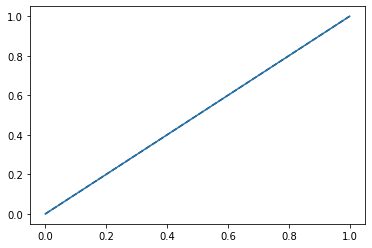

In [233]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
print("F1:",metrics.f1_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve ( y_test, y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

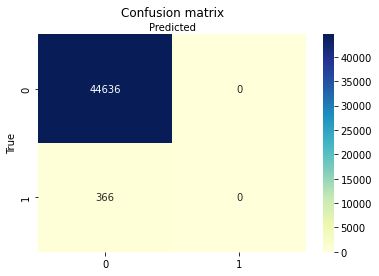

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# input 256 , epochs 5

In [235]:
xmodel = Sequential()
xmodel.add(SimpleRNN(256, input_shape=[16,1]))
xmodel.add(Dense(1))
xmodel.build()
xmodel.summary()
xmodel.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [236]:
xmodel.fit(x=scaled_X_train, y=y_train, epochs=5, validation_data=(scaled_X_test, y_test))

Epoch 1/5
5626/5626 [==============================] - 85s 15ms/step - loss: 0.0087 - accuracy: 0.9915 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 2/5
5626/5626 [==============================] - 84s 15ms/step - loss: 0.0083 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 3/5
5626/5626 [==============================] - 83s 15ms/step - loss: 0.0100 - accuracy: 0.9913 - val_loss: 0.0090 - val_accuracy: 0.9919
Epoch 4/5
5626/5626 [==============================] - 84s 15ms/step - loss: 0.0092 - accuracy: 0.9917 - val_loss: 0.0084 - val_accuracy: 0.9919
Epoch 5/5
5626/5626 [==============================] - 83s 15ms/step - loss: 0.0094 - accuracy: 0.9917 - val_loss: 0.0085 - val_accuracy: 0.9919


In [237]:
xmodel.evaluate(scaled_X_test, y_test, verbose=1)
y_pred=xmodel.predict(scaled_X_test, verbose=1)
y_pred_inv = encoder.inverse_transform(y_pred)

1407/1407 [==============================] - 8s 5ms/step


Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


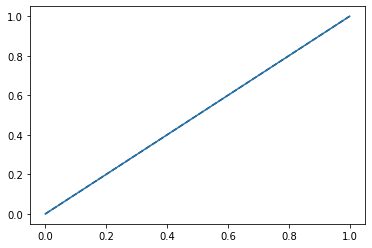

In [238]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
print("F1:",metrics.f1_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve ( y_test, y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

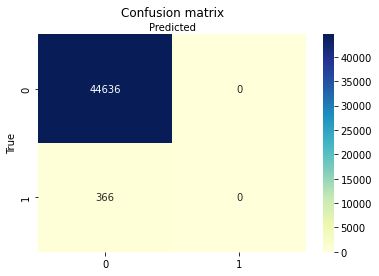

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# input 256, epochs 10

In [240]:
xmodel = Sequential()
xmodel.add(SimpleRNN(256, input_shape=[16,1]))
xmodel.add(Dense(1))
xmodel.build()
xmodel.summary()
xmodel.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [241]:
xmodel.fit(x=scaled_X_train, y=y_train, epochs=5, validation_data=(scaled_X_test, y_test))

Epoch 1/5
5626/5626 [==============================] - 85s 15ms/step - loss: 0.0088 - accuracy: 0.9915 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 2/5
5626/5626 [==============================] - 84s 15ms/step - loss: 0.0083 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 0.9919
Epoch 3/5
5626/5626 [==============================] - 82s 15ms/step - loss: 0.0109 - accuracy: 0.9908 - val_loss: 0.0106 - val_accuracy: 0.9919
Epoch 4/5
5626/5626 [==============================] - 84s 15ms/step - loss: 0.0099 - accuracy: 0.9915 - val_loss: 0.0083 - val_accuracy: 0.9919
Epoch 5/5
5626/5626 [==============================] - 83s 15ms/step - loss: 0.0094 - accuracy: 0.9917 - val_loss: 0.0090 - val_accuracy: 0.9919


In [242]:
xmodel.evaluate(scaled_X_test, y_test, verbose=1)
y_pred=xmodel.predict(scaled_X_test, verbose=1)
y_pred_inv = encoder.inverse_transform(y_pred)

1407/1407 [==============================] - 8s 5ms/step


Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


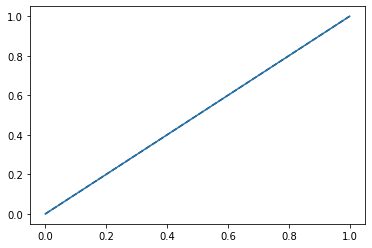

In [243]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
print("F1:",metrics.f1_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve ( y_test, y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

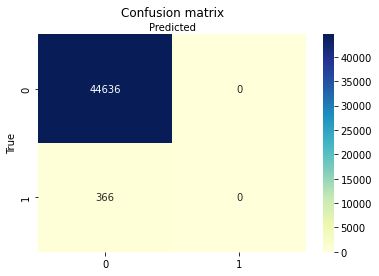

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')